In [22]:

import sys
!{sys.executable} -m pip install scikit-learn seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import time
import glob


In [4]:
input_files = sorted(glob.glob('data/train/input_*.csv'))
output_files = sorted(glob.glob('data/train/output_*.csv'))

print(f"Input files: {len(input_files)}")
print(f"Output files: {len(output_files)}")

Input files: 18
Output files: 18


In [5]:
input_dfs = []
output_dfs = []

for input_file, output_file in zip(input_files[:5], output_files[:5]):
    input_dfs.append(pd.read_csv(input_file))
    output_dfs.append(pd.read_csv(output_file))

input_df = pd.concat(input_dfs, ignore_index=True)
output_df = pd.concat(output_dfs, ignore_index=True)

print(f"Input shape: {input_df.shape}")
print(f"Output shape: {output_df.shape}")

Input shape: (1399311, 23)
Output shape: (159814, 6)


In [6]:
input_df.head() 
output_df.head()

,game_id,play_id,nfl_id,frame_id,x,y
0,2023090700,101,46137,1,56.22,17.28
1,2023090700,101,46137,2,56.63,16.88
2,2023090700,101,46137,3,57.06,16.46
3,2023090700,101,46137,4,57.48,16.02
4,2023090700,101,46137,5,57.91,15.56


In [7]:
merged_df = input_df.merge(
    output_df, 
    on=['game_id', 'play_id', 'nfl_id'],
    suffixes=('_input', '_output')
)

print(f"Merged shape: {merged_df.shape}")

Merged shape: (4634163, 26)


In [8]:
feature_cols = ['x_input', 'y_input', 's', 'a', 'dir', 'o']
target_cols = ['x_output', 'y_output']

X = merged_df[feature_cols].fillna(0)
y = merged_df[target_cols].fillna(0)

print(f"Features: {X.shape}")
print(f"Targets: {y.shape}")

Features: (4634163, 6)
Targets: (4634163, 2)


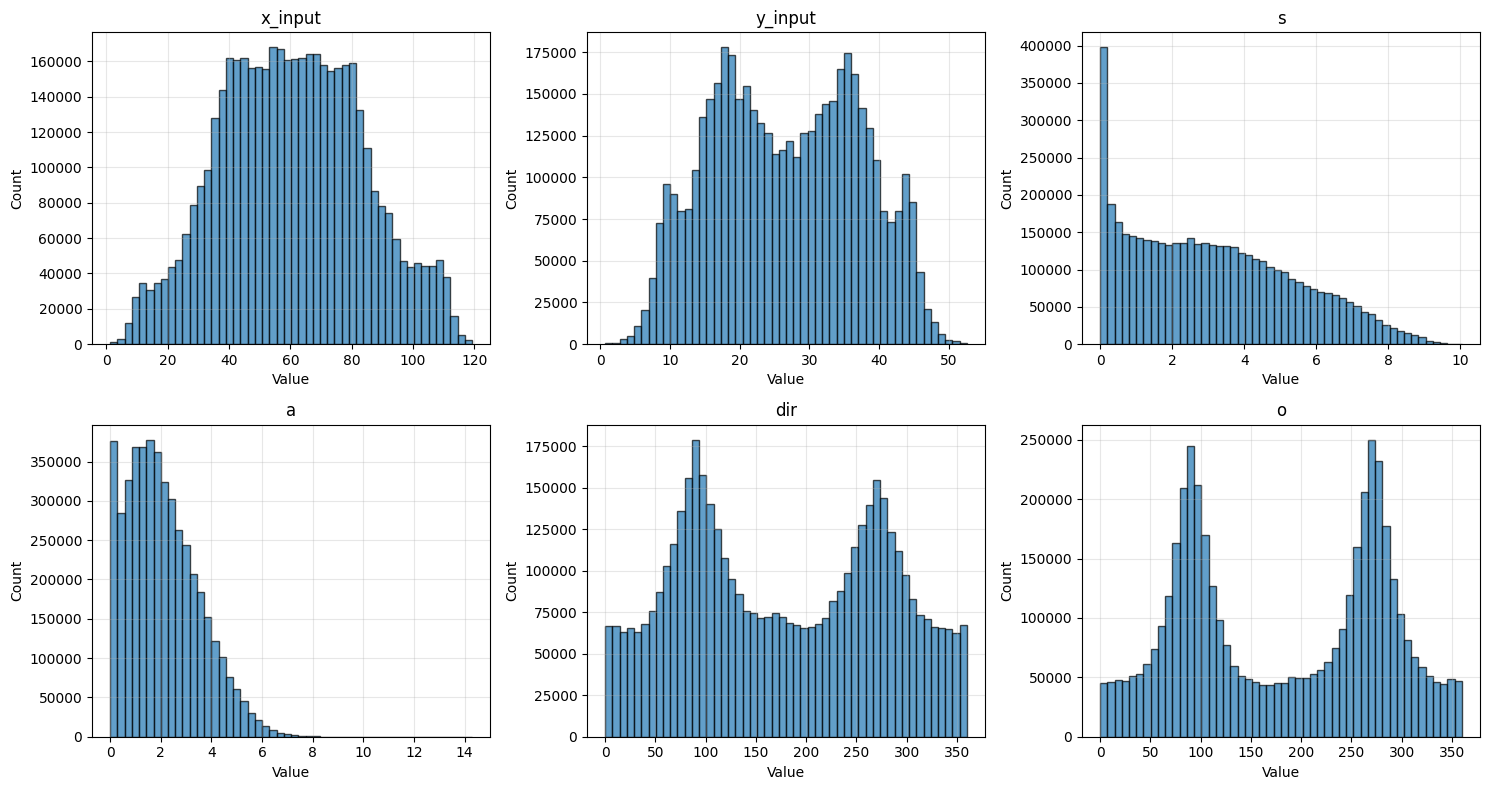

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for idx, col in enumerate(feature_cols):
    ax = axes[idx // 3, idx % 3]
    ax.hist(X[col], bins=50, edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

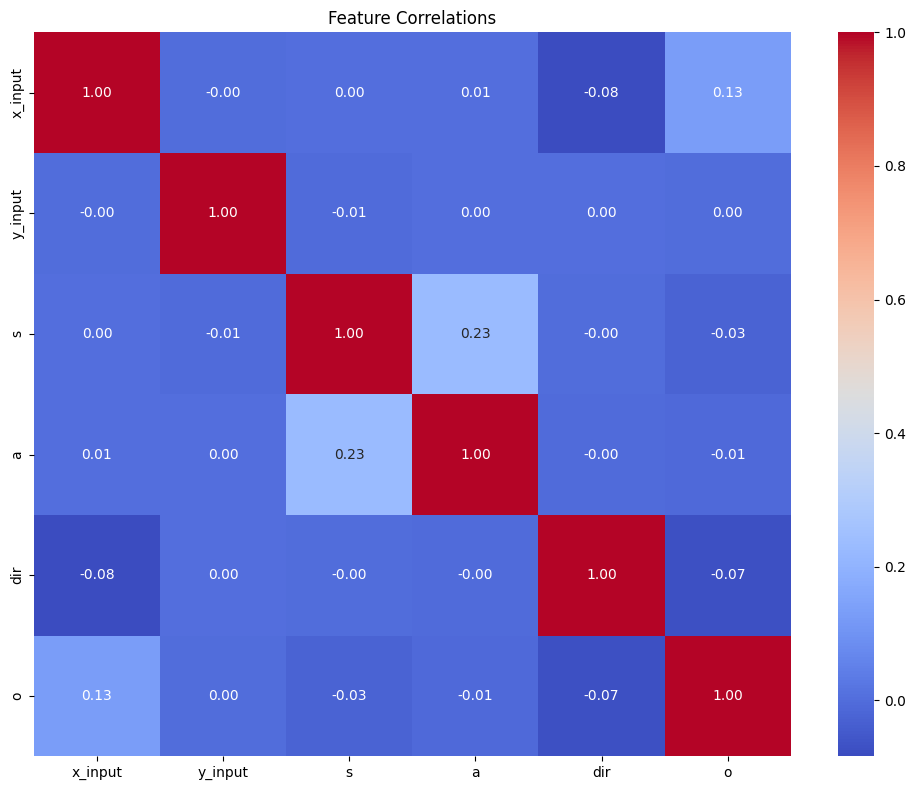

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled train shape: {X_train_scaled.shape}")
print(f"Scaled test shape: {X_test_scaled.shape}")

Train: (3707330, 6)
Test: (926833, 6)
Scaled train shape: (3707330, 6)
Scaled test shape: (926833, 6)


In [23]:
sample_size = 500000
X_train_sample = X_train_scaled[:sample_size]
y_train_sample = y_train.iloc[:sample_size]

model = MLPRegressor(
    hidden_layer_sizes=(50,),  # Simpler model
    activation='relu',
    solver='adam',
    max_iter=50,  # Fewer epochs
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=True  # See progress
)

start = time.time()
model.fit(X_train_sample, y_train_sample)
train_time = time.time() - start

print(f"Training time: {train_time:.4f}s")

## when we can run on pc 
"""
model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

start = time.time()
model.fit(X_train_scaled, y_train)
train_time = time.time() - start

print(f"Training time: {train_time:.4f}s")
"""

Iteration 1, loss = 256.25414860
Validation score: 0.798638
Iteration 2, loss = 29.84929238
Validation score: 0.839716
Iteration 3, loss = 23.96284932
Validation score: 0.849383
Iteration 4, loss = 22.50448672
Validation score: 0.853243
Iteration 5, loss = 21.94143520
Validation score: 0.855503
Iteration 6, loss = 21.70597034
Validation score: 0.856749
Iteration 7, loss = 21.57192643
Validation score: 0.857663
Iteration 8, loss = 21.48201686
Validation score: 0.858147
Iteration 9, loss = 21.41375363
Validation score: 0.858501
Iteration 10, loss = 21.36343379
Validation score: 0.858793
Iteration 11, loss = 21.32127366
Validation score: 0.859113
Iteration 12, loss = 21.28410882
Validation score: 0.859299
Iteration 13, loss = 21.25317033
Validation score: 0.859637
Iteration 14, loss = 21.22571577
Validation score: 0.859709
Iteration 15, loss = 21.20083957
Validation score: 0.859820
Iteration 16, loss = 21.17607862
Validation score: 0.860012
Iteration 17, loss = 21.15765771
Validation scor

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


'\nmodel = MLPRegressor(\n    hidden_layer_sizes=(100, 50),\n    activation=\'relu\',\n    solver=\'adam\',\n    max_iter=200,\n    random_state=42,\n    early_stopping=True,\n    validation_fraction=0.1\n)\n\nstart = time.time()\nmodel.fit(X_train_scaled, y_train)\ntrain_time = time.time() - start\n\nprint(f"Training time: {train_time:.4f}s")\n'

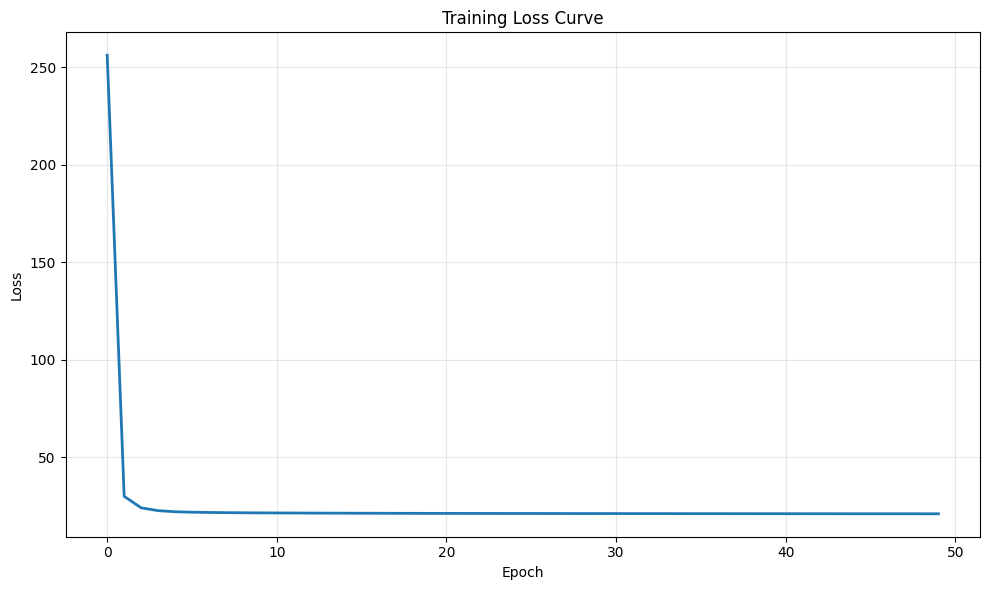

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
start = time.time()
y_train_pred = model.predict(X_train_scaled)
train_pred_time = time.time() - start

start = time.time()
y_test_pred = model.predict(X_test_scaled)
test_pred_time = time.time() - start

print(f"Train prediction time: {train_pred_time:.4f}s")
print(f"Test prediction time: {test_pred_time:.4f}s")

Train prediction time: 1.9765s
Test prediction time: 0.4028s


In [16]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

Train RMSE: 6.4730
Test RMSE: 6.4796
Train R2: 0.8635
Test R2: 0.8638


In [17]:
metrics_df = pd.DataFrame({
    'Metric': [
        'Train Time',
        'Train Pred Time',
        'Test Pred Time',
        'Train RMSE',
        'Test RMSE',
        'Train R2',
        'Test R2'
    ],
    'Value': [
        f'{train_time:.4f}s',
        f'{train_pred_time:.4f}s',
        f'{test_pred_time:.4f}s',
        f'{train_rmse:.4f}',
        f'{test_rmse:.4f}',
        f'{train_r2:.4f}',
        f'{test_r2:.4f}'
    ]
})

metrics_df

,Metric,Value
0,Train Time,22.2413s
1,Train Pred Time,1.9765s
2,Test Pred Time,0.4028s
3,Train RMSE,6.4730
4,Test RMSE,6.4796
5,Train R2,0.8635
6,Test R2,0.8638


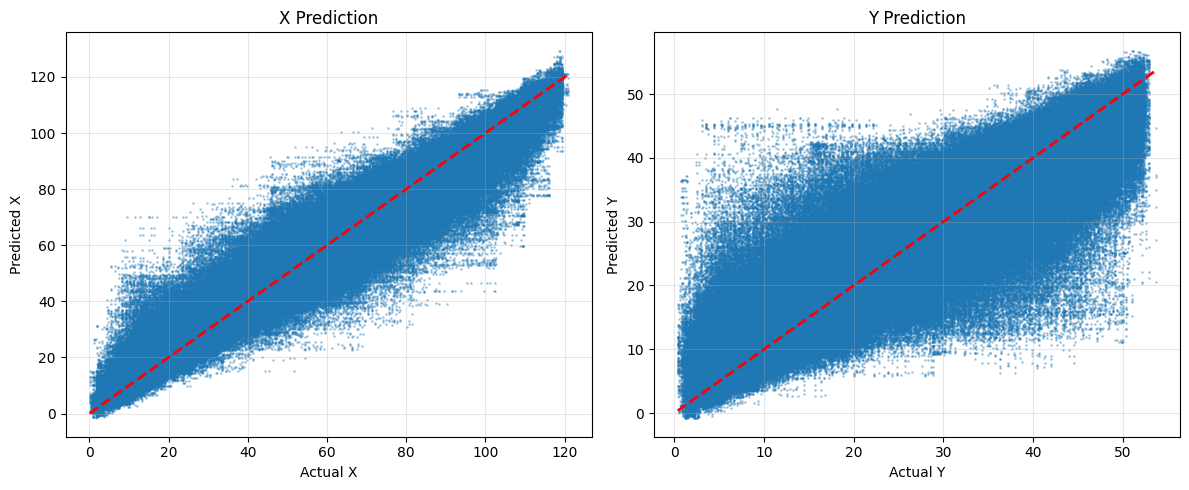

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(y_test.iloc[:, 0], y_test_pred[:, 0], alpha=0.3, s=1)
axes[0].plot([y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], 
             [y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], 
             'r--', linewidth=2)
axes[0].set_xlabel('Actual X')
axes[0].set_ylabel('Predicted X')
axes[0].set_title('X Prediction')
axes[0].grid(alpha=0.3)

axes[1].scatter(y_test.iloc[:, 1], y_test_pred[:, 1], alpha=0.3, s=1)
axes[1].plot([y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()], 
             [y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()], 
             'r--', linewidth=2)
axes[1].set_xlabel('Actual Y')
axes[1].set_ylabel('Predicted Y')
axes[1].set_title('Y Prediction')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

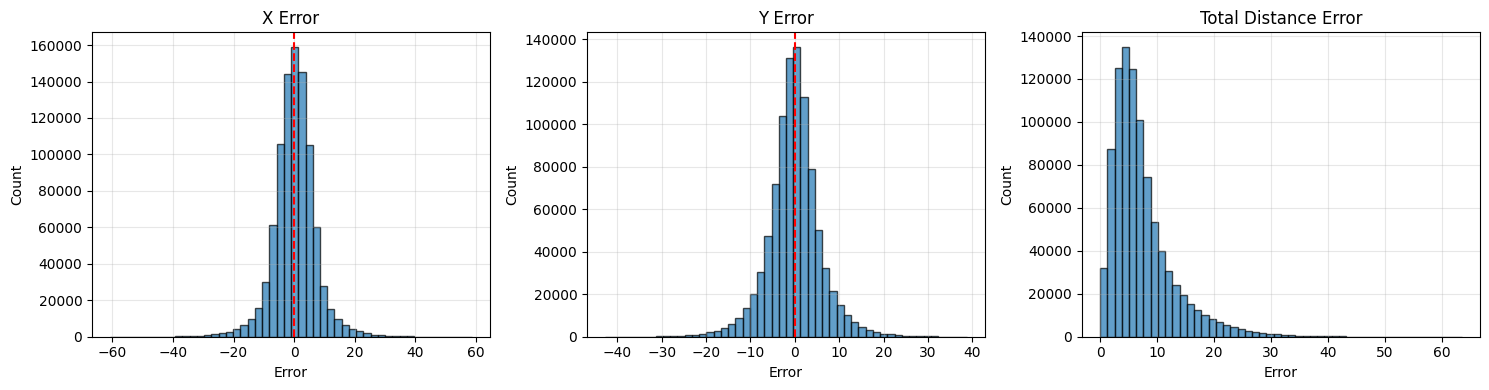

Mean error: 7.3370
Median error: 5.9149


In [21]:
errors_x = y_test['x_output'].values - y_test_pred[:, 0]
errors_y = y_test['y_output'].values - y_test_pred[:, 1]
errors_total = np.sqrt(errors_x**2 + errors_y**2)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(errors_x, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--')
axes[0].set_xlabel('Error')
axes[0].set_ylabel('Count')
axes[0].set_title('X Error')
axes[0].grid(alpha=0.3)

axes[1].hist(errors_y, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_xlabel('Error')
axes[1].set_ylabel('Count')
axes[1].set_title('Y Error')
axes[1].grid(alpha=0.3)

axes[2].hist(errors_total, bins=50, edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Error')
axes[2].set_ylabel('Count')
axes[2].set_title('Total Distance Error')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean error: {errors_total.mean():.4f}")
print(f"Median error: {np.median(errors_total):.4f}")